In [5]:
import numpy as np
import pandas as pd



In [7]:
data = pd.read_excel('housing.xls')

data

,CRIM,ZN,INDUS,CHAS,NNOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
data.info()

data['CHAS'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NNOX       506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


0    471
1     35
Name: CHAS, dtype: int64

In [5]:
import matplotlib.pyplot as plt
data.hist(bins=50 , figsize= (20,15))
plt.show()# y axis represent number of observaation

<Figure size 2000x1500 with 16 Axes>

# train  test split




In [6]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(data, test_size =0.2 ,random_state =1)

# stratfied shuffled spit

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2,random_state = 1)
for trainindex, testindex in split.split(data, data['CHAS']):
    strattrainset = data.loc[trainindex]
    strattestset = data.loc[testindex]

In [17]:
strattrainset
strattrainset['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

# looking for correlation

In [10]:
corr_matrix = data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
#this fn is used to check if we increase value of a paritcular column (say MEDV) then value  
#of other column will increase or decrease

#value near to one strong close correlation

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NNOX      -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0783FE30>,
      dtype=object)

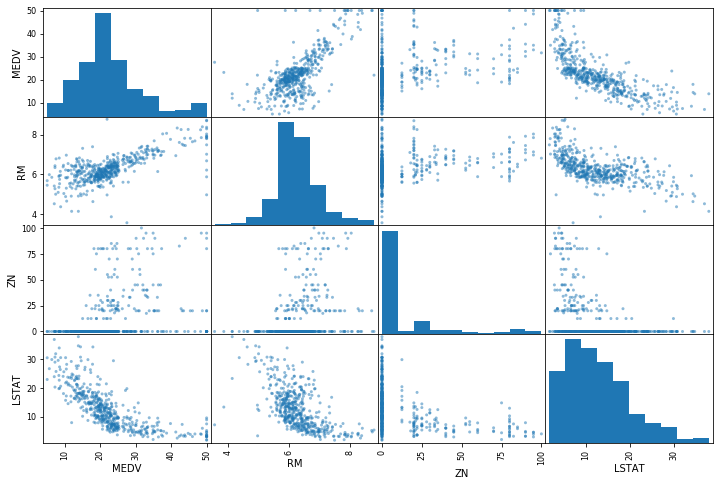

In [16]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN','LSTAT']
scatter_matrix(data[attributes],figsize = (12,8))

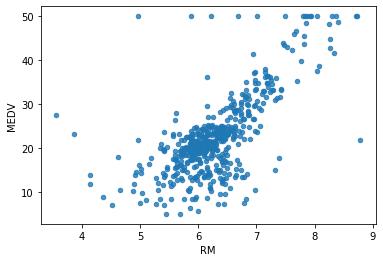

In [19]:
data.plot(kind='scatter',x='RM', y='MEDV',alpha='0.8')

# TRYING OUT  ATTRIBUTE COMBINATION

In [21]:
data['TAXRM'] = data['TAX']/data['RM']
data.head()#here we added a new column

,CRIM,ZN,INDUS,CHAS,NNOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [22]:
corr_matrix = data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NNOX      -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

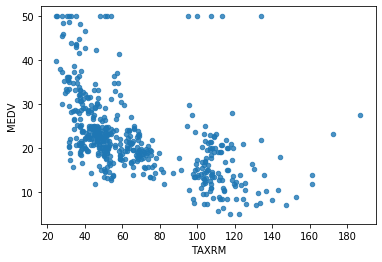

In [23]:
data.plot(kind='scatter',x='TAXRM', y='MEDV',alpha='0.8')